<br/><br/><br/><br/>
<h1> 실습 문제 </h1>


###  실습 1. 
####  가중치가 없는 그래프 표현이 $G=(V,E)$ 로 주어자는 경우에, 주어진 source node 와 destination node 간의 최단 경로를 찾는 파이썬 함수를 코딩하여 보시오. 
#### 또한, 이 경우에 [그림 1]에 대하여, 노드 'E' 에서 노드 'N' 까지의 최단 경로, shortest_path 를 구하고, 출력이 "The shortest path from node 'E' to node 'N' = shortest_path " 로 나오도록 해보시오.

In [1]:
def find_shortest_pathG(graph, start, end, path=[]): #  G=(V,E) ; V 는 노드 집합 및 E 는 에지 집합으로 처리
        path = path + [start] # path 는 노드 리스트로 처리        
        V=graph[0]
        E=graph[1]             
        EL=list(E)
        EL.sort() # 에지 집합을  에지 리스트로 변환 처리
        
        if start == end:
            return path
        if start not in V:
            return None
        
        shortest = None
        
        for edge in EL: # node 는 노드 start 의 인접노드 리스트임
            if edge[0] ==start:                
                if edge[1] not in path:
                    NE=E-{edge}                                                      
                    new_graph=(V, NE)                    
                    newpath = find_shortest_pathG(new_graph, edge[1], end, path)
                    if newpath:
                        if not shortest or len(newpath) < len(shortest):
                            shortest = newpath                            
                else:
                    exit
            elif edge[1]==start:                   
                if edge[0] not in path:                
                    NE=E-{edge}                                                                         
                    new_graph=(V, NE) 
                    newpath = find_shortest_pathG(new_graph, edge[0], end, path)
                    if newpath:
                        if not shortest or len(newpath) < len(shortest):
                            shortest = newpath                         
                else:
                    exit
        
        return shortest    

In [2]:
V = {'B', 'E', 'F', 'L', 'N',  'S' }
E={('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')}
G2=(V, E)
shortest_path=find_shortest_pathG(G2, 'E', 'N')
print("The shortest path from node '{}' to node '{}' = {}".format('E', 'N', shortest_path))

The shortest path from node 'E' to node 'N' = ['E', 'F', 'N']


###  실습 2.
#### 실습 1의 파이썬 함수를 활용하여, 주어진 그래프의 각 노드 간의 최단 경로를 구해보시오. 단, 2개 노드 $v_i, v_j $ 쌍에 대해서,  2 노드간의 최단 경로는 노드 $v_i $ 에서 $v_j$ 의 최단 경로만을 구하고,  $v_j $ 에서 $v_i$ 는 구하지 마시오. 즉 2개 노드 쌍 간의 최단 경로는 알파벳ㅅ이 작은 노드에서 큰 노드간의 최단 경로만을 구합니다. 

In [3]:
def find_shortest_pathG_btn_all_two_nodes(graph):
    V=graph[0]
    VL=list(V)
    VL.sort()
    n=len(graph[0])
    tot_n=n*(n-1)/2
    two_nodes_list=[ ]
    for i in range(n):
        for j in range(i+1, n):
            two_nodes_list.append((VL[i], VL[j]))
    for edge in two_nodes_list:
        shortest_path=find_shortest_pathG(graph, edge[0], edge[1])
        print("The shortest path from node '{}' to node '{}' = {}".format(edge[0], edge[1], shortest_path))        

![Alttext](fig1.png)

In [4]:
find_shortest_pathG_btn_all_two_nodes(G2)

The shortest path from node 'B' to node 'E' = ['B', 'F', 'E']
The shortest path from node 'B' to node 'F' = ['B', 'F']
The shortest path from node 'B' to node 'L' = ['B', 'L']
The shortest path from node 'B' to node 'N' = ['B', 'N']
The shortest path from node 'B' to node 'S' = ['B', 'S']
The shortest path from node 'E' to node 'F' = ['E', 'F']
The shortest path from node 'E' to node 'L' = ['E', 'L']
The shortest path from node 'E' to node 'N' = ['E', 'F', 'N']
The shortest path from node 'E' to node 'S' = ['E', 'L', 'S']
The shortest path from node 'F' to node 'L' = ['F', 'L']
The shortest path from node 'F' to node 'N' = ['F', 'N']
The shortest path from node 'F' to node 'S' = ['F', 'B', 'S']
The shortest path from node 'L' to node 'N' = ['L', 'N']
The shortest path from node 'L' to node 'S' = ['L', 'S']
The shortest path from node 'N' to node 'S' = ['N', 'S']


### 실습 3, 4 
####    다음과 같은 그래프가 주어진다고 하자.

![Exercise](11-exer.png)

### 실습 3.
#### "networkx' 파이썬 패키지를 사용하지 말고, 노드 F 에서 각 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 구하는 파이썬 프로그래밍을 해보시오.


In [5]:
def find_shortest_path2(graph, start, end, path=[], distance=0):
        path = path+ [start]            
        if start == end:
            return path, distance
        if not start in graph:
            return None, inf
        
        shortest_path = None
        shortest_path_distance = sum([edge[2] for edge in edges])

        for node in graph[start]:
            if node[0] not in path:                
                distance= distance+node[1]   
                
                new_path, new_path_distance = find_shortest_path2(graph, node[0], end, path, distance)
                distance=distance-node[1]
                if new_path:
                    if not shortest_path or new_path_distance < shortest_path_distance:
                        shortest_path = new_path
                        shortest_path_distance = new_path_distance
                        
        return shortest_path, shortest_path_distance

In [6]:
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
nodes=[A,B,C,D,E,F,G,H,I]
edges=[(A, B, 2), (A, G, 3), (A, F, 7), (B, C, 4), (B, G, 6), (C, D, 2), (C, H, 2), 
       (D, E, 1), (D, H, 8), (E, F, 6), (E, I, 2), (F, I, 5), (G, I, 1), (G, H, 3), (H, I, 4)]
raw_graph = { n:list() for n in nodes }
for edge in edges :
    raw_graph[edge[0]].append([edge[1], edge[2]])
    raw_graph[edge[1]].append([edge[0], edge[2]])

In [7]:
src = 'F'
dst = 'BCDHG'
for d in dst :
    print('노드 '+src+'에서 노드 '+d+'까지 최단 경로는',
          find_shortest_path2(raw_graph, src, d)[0],
          '이며 최단 거리는',
          find_shortest_path2(raw_graph, src, d)[1],
          '이다')

노드 F에서 노드 B까지 최단 경로는 ['F', 'A', 'B'] 이며 최단 거리는 9 이다
노드 F에서 노드 C까지 최단 경로는 ['F', 'E', 'D', 'C'] 이며 최단 거리는 9 이다
노드 F에서 노드 D까지 최단 경로는 ['F', 'E', 'D'] 이며 최단 거리는 7 이다
노드 F에서 노드 H까지 최단 경로는 ['F', 'I', 'G', 'H'] 이며 최단 거리는 9 이다
노드 F에서 노드 G까지 최단 경로는 ['F', 'I', 'G'] 이며 최단 거리는 6 이다


### 실습 4.
#### 그래프 이론을 공부했던 이산이는 문득 지금까지 배웠던 최단 거리 말고 최장 거리를 구하려면 어떻게 해야하는 지 궁금했다, 이를 위해 이산이는 반 친구들의 이름을 빌려 아래처럼 그래프를 그려보았다.

<b>노드 정보</b>
<br/>'노리', '새롬', '나래', '하은', '시내', '아름', '푸름', '마루', '하랑', '진운', '영현', '이산'

<b>엣지(거리) 정보</b>
<br/>[('나래', '영현', 1), ('하은', '하랑', 8), ('하랑', '진운', 1), ('시내', '마루', 7), ('나래', '진운', 2), ('푸름', '하랑', 5), ('새롬', '영현', 7), ('새롬', '시내', 8), ('노리', '아름', 3), ('나래', '하은', 9), ('하은', '아름', 3), ('나래', '마루', 4), ('시내', '푸름', 6), ('하은', '시내', 3), ('노리', '시내', 4), ('푸름', '진운', 7), ('아름', '푸름', 2), ('새롬', '하랑', 7), ('푸름', '영현', 10),
 ('아름', '마루', 6), ('노리', '이산', 7), ('새롬', '나래', 1), ('하은', '마루', 10), ('나래', '아름', 1), ('아름', '이산', 10), ('노리', '하랑', 8), ('영현', '이산', 2), ('시내', '하랑', 6), ('노리', '새롬', 9), ('노리', '마루', 4), ('마루', '이산', 8), ('새롬', '푸름', 9), ('새롬', '하은', 8), ('아름', '하랑', 8), ('나래', '시내', 7), ('새롬', '마루', 3), ('노리', '진운', 4), ('아름', '영현', 9),
 ('노리', '푸름', 5), ('시내', '진운', 1), ('새롬', '이산', 3), ('나래', '이산', 4), ('시내', '이산', 4), ('하은', '이산', 10)]

![prob4](11-prob4.png)

<br/>위 그래프에서 각 노드 간 엣지는 친구 관계를 나타내며 거리 값은 친밀도를 나타낸다. (높을수록 서로 더 친밀하다)
<br/>이산이는 최대 2명의 친구를 거쳐 새로운 친구를 소개받고 싶다고 했을 때 서로 서로 매우 친한 사이였으면 좋겠다고 생각했다.
<br/>현재 이산이와 친구 관계를 맺지 않은 반 친구들을 찾고 어떤 친구에게 소개를 받아야 하는 지 구하시오.

하은이에게 진운이를 소개할 경우 출력 예시는 아래와 같다.
<br/>"하은에게 진운을 소개하려면 ['새롬', '푸름'] 를 거쳐야 한다. 이때 친밀도(거리값)는 24 으로 가장 높다."

In [11]:
import networkx as nx
from matplotlib import font_manager, rc, pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

In [12]:
def draw_graph(graph, pos=None) :
    if pos == None : pos=nx.spring_layout(graph)
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(graph, pos=pos, node_size=2000, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=20, font_family=font_name)
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_size=15, rotate=False)
    plt.show()

In [13]:
A,B,C,D,E,F,G,H,I,J,K,L = '노리', '새롬', '나래', '하은', '시내', '아름', '푸름', '마루', '하랑', '진운', '영현', '이산'
fbGraph=nx.Graph()
nodes=[A,B,C,D,E,F,G,H,I,J,K,L]
edges=[('나래', '영현', 1), ('하은', '하랑', 8), ('하랑', '진운', 1), ('시내', '마루', 7), ('나래', '진운', 2), ('푸름', '하랑', 5), ('새롬', '영현', 7), ('새롬', '시내', 8), ('노리', '아름', 3), ('나래', '하은', 9), ('하은', '아름', 3), ('나래', '마루', 4), ('시내', '푸름', 6), ('하은', '시내', 3), ('노리', '시내', 4), ('푸름', '진운', 7), ('아름', '푸름', 2), ('새롬', '하랑', 7), ('푸름', '영현', 10), ('아름', '마루', 6), ('노리', '이산', 7), ('새롬', '나래', 1), ('하은', '마루', 10), ('나래', '아름', 1), ('아름', '이산', 10), ('노리', '하랑', 8), ('영현', '이산', 2), ('시내', '하랑', 6), ('노리', '새롬', 9), ('노리', '마루', 4), ('마루', '이산', 8), ('새롬', '푸름', 9), ('새롬', '하은', 8), ('아름', '하랑', 8), ('나래', '시내', 7), ('새롬', '마루', 3), ('노리', '진운', 4), ('아름', '영현', 9), ('노리', '푸름', 5), ('시내', '진운', 1), ('새롬', '이산', 3), ('나래', '이산', 4), ('시내', '이산', 4), ('하은', '이산', 10)]
fbGraph.add_nodes_from(nodes)
fbGraph.add_weighted_edges_from(edges)

In [ ]:
# from random import randint as r
# edges = set()
# for i in range(int(len(nodes)**2/2)) :
#     edge = sorted([r(0,11), r(0,11)])
#     if edge[0] != edge[1] : edges.add((nodes[edge[0]], nodes[edge[1]]))
# edges = [ (edge[0], edge[1], r(1, 10)) for edge in edges]
# fbGraph.add_weighted_edges_from(edges)

In [14]:
from math import cos, sin, pi
pos = {nodes[i]:(cos(2*pi/len(nodes)*i), sin(2*pi/len(nodes)*i)) for i in range(len(nodes))}

C:\Users\Park\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


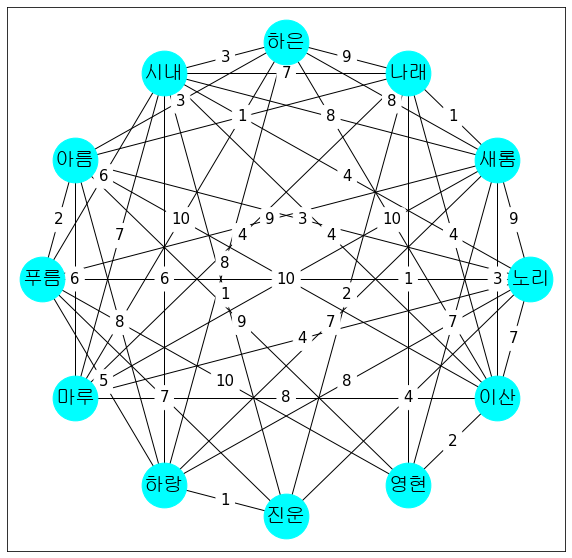

In [15]:
draw_graph(fbGraph, pos)

In [16]:
def findWeight(edges, path) :
    weight = 0
    for i in range(len(path)-1) :
        target = (path[i], path[i+1])
        for edge in edges :
            if target[0] == edge[0] and target[1] == edge[1] or target[1] == edge[0] and target[0] == edge[1] :
                weight += edge[2]
                break
    return weight

In [17]:
def findIntroducer(graph, src, dst, cutoff) :
    paths = [path for path in nx.all_simple_paths(graph, src, dst, cutoff = cutoff)]
    weights = [findWeight(edges, path) for path in paths]
    weightsAndPaths = [(weights[i], paths[i]) for i in range(len(paths))]
    return sorted(weightsAndPaths, key=lambda wap : wap[0])[-1]

In [18]:
# 출력 예시 : 하은 -> 진운
introducer = findIntroducer(fbGraph, D, J, 3)
print('{}에게 {}을 소개하려면'.format(D, J), introducer[1][1:-1], '를 거쳐야 한다. 이때 친밀도(거리값)는',introducer[0], '으로 가장 높다.')

하은에게 진운을 소개하려면 ['새롬', '푸름'] 를 거쳐야 한다. 이때 친밀도(거리값)는 24 으로 가장 높다.


In [19]:
# 정답 예시
src = '이산'
unknowns = ['푸름', '하랑', '진운']
for unknown in unknowns :
    introducer = findIntroducer(fbGraph, src, unknown, 3)
    print('{}에게 {}을 소개하려면'.format(src, unknown), introducer[1][1:-1], '를 거쳐야 한다. 이때 친밀도(거리값)는',introducer[0], '으로 가장 높다.')

이산에게 푸름을 소개하려면 ['아름', '영현'] 를 거쳐야 한다. 이때 친밀도(거리값)는 29 으로 가장 높다.
이산에게 하랑을 소개하려면 ['마루', '하은'] 를 거쳐야 한다. 이때 친밀도(거리값)는 26 으로 가장 높다.
이산에게 진운을 소개하려면 ['하은', '나래'] 를 거쳐야 한다. 이때 친밀도(거리값)는 21 으로 가장 높다.
